
### Data review

Ideas, code based on https://github.com/gianlucahmd/loads_clustering

** TODO check why loads are not more continous - seem highly erratic **

In [57]:
import os, sys
sys.path.append("tools/")
import pandas as pd
import datetime

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

import numpy as np

In [58]:
pd.set_option('display.max_columns', None)

In [59]:
PATH='../input/merged_data/'

In [60]:
spring_start = "03-01" 
spring_end = "05-31"
summer_start = "06-01" 
summer_end = "08-31"
autumn_start = "09-01" 
autumn_end = "11-30"
winter_start = "12-01" 
winter_end = "02-28" 
winter_end_leap = "02-29"#2012

In [61]:
#files= []
#folder = "data/COMMERCIAL_LOAD_DATA_E_PLUS_OUTPUT.part1/USA_CA_Montague-Siskiyou.County.AP.725955_TMY3/"
#for file in os.listdir(folder):
#    files.append(file)

In [62]:
#path = "data/COMMERCIAL_LOAD_DATA_E_PLUS_OUTPUT.part1/USA_CA_Montague-Siskiyou.County.AP.725955_TMY3/RefBldgFullServiceRestaurantNew2004_v1.3_7.1_5B_USA_CO_BOULDER.csv"
#df = make_df(path)

In [8]:
#df.head()

In [9]:
daily_all = pd.read_csv('../input/merged_data/daily_all.csv')

In [10]:
daily_all.head()

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,0,MAC000041,2011-12-08,0.2950,0.396259,1.071,27,0.285051,10.699,0.119
1,1,MAC000041,2011-12-09,0.2040,0.235437,0.744,48,0.184686,11.301,0.023
2,2,MAC000041,2011-12-10,0.1710,0.206854,1.038,48,0.198331,9.929,0.024
3,3,MAC000041,2011-12-11,0.1545,0.165333,0.381,48,0.102056,7.936,0.062
4,4,MAC000041,2011-12-12,0.1295,0.156250,0.330,48,0.099748,7.500,0.024


In [11]:
all_start_stop = daily_all.iloc[[0, -1]]
all_start_stop

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,0,MAC000041,2011-12-08,0.295,0.396259,1.071,27,0.285051,10.699,0.119
3510432,31506,MAC005133,2014-02-28,0.271,0.271000,0.271,1,NaN,0.271,0.271


In [12]:
mac_02 = daily_all.loc[daily_all['LCLid']=='MAC000002']

In [13]:
mac_02_start_stop = mac_02.iloc[[0, -1]]
mac_02_start_stop

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
3078018,0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
3078522,504,MAC000002,2014-02-28,1.3870,1.387000,1.387,1,NaN,1.387,1.387


In [63]:
start_date = "2012-10-12"
end_date = "2014-02-28"

workdays = pd.bdate_range(start_date,end_date)
all_days = pd.date_range(start_date,end_date)
len(all_days), len(workdays)

(505, 361)

In [64]:

#satsun = pd.offsets.CustomBusinessDay(weekmask='Sat Sun')
#offdays = pd.bdate_range(start_date, end_date, weekmask=satsun)
weekends = all_days[np.logical_not(all_days.isin(workdays))]

In [65]:
weekends

DatetimeIndex(['2012-10-13', '2012-10-14', '2012-10-20', '2012-10-21',
               '2012-10-27', '2012-10-28', '2012-11-03', '2012-11-04',
               '2012-11-10', '2012-11-11',
               ...
               '2014-01-25', '2014-01-26', '2014-02-01', '2014-02-02',
               '2014-02-08', '2014-02-09', '2014-02-15', '2014-02-16',
               '2014-02-22', '2014-02-23'],
              dtype='datetime64[ns]', length=144, freq=None)

In [66]:
halfhourly_all = pd.read_csv('../input/merged_data/halfhourly_all.csv')

In [67]:
#drop these bad rows
halfhourly_all = halfhourly_all.loc[halfhourly_all['energy(kWh/hh)'] != 'Null']

In [68]:
halfhourly_all.head()

,Unnamed: 0,LCLid,tstp,energy(kWh/hh)
0,0,MAC000041,2011-12-08 10:30:00.0000000,0.126
1,1,MAC000041,2011-12-08 11:00:00.0000000,0.12
2,2,MAC000041,2011-12-08 11:30:00.0000000,0.119
3,3,MAC000041,2011-12-08 12:00:00.0000000,0.425
4,4,MAC000041,2011-12-08 12:30:00.0000000,0.154


In [69]:
halfhourly_all.rename(columns={'tstp':'date'}, inplace=True)
halfhourly_all.drop(columns=['Unnamed: 0'], inplace=True)

In [70]:
halfhourly_all.head()

,LCLid,date,energy(kWh/hh)
0,MAC000041,2011-12-08 10:30:00.0000000,0.126
1,MAC000041,2011-12-08 11:00:00.0000000,0.12
2,MAC000041,2011-12-08 11:30:00.0000000,0.119
3,MAC000041,2011-12-08 12:00:00.0000000,0.425
4,MAC000041,2011-12-08 12:30:00.0000000,0.154


In [71]:
halfhourly_all['day_time'] = pd.to_datetime(halfhourly_all['date'], format='%Y-%m-%d %H:%M:%S')

In [72]:
halfhourly_all.head()

,LCLid,date,energy(kWh/hh),day_time
0,MAC000041,2011-12-08 10:30:00.0000000,0.126,2011-12-08 10:30:00
1,MAC000041,2011-12-08 11:00:00.0000000,0.12,2011-12-08 11:00:00
2,MAC000041,2011-12-08 11:30:00.0000000,0.119,2011-12-08 11:30:00
3,MAC000041,2011-12-08 12:00:00.0000000,0.425,2011-12-08 12:00:00
4,MAC000041,2011-12-08 12:30:00.0000000,0.154,2011-12-08 12:30:00


In [73]:
#test plot

In [74]:
#datetime64[ns]
halfhourly_all.dtypes

LCLid                     object
date                      object
energy(kWh/hh)            object
day_time          datetime64[ns]
dtype: object

In [75]:
day = workdays[0]

In [76]:
df = halfhourly_all.loc[halfhourly_all['LCLid'] == mac]
hour_idx = df.loc[(df['day_time'].dt.year==day.year) & (df['day_time'].dt.month==day.month) & (df['day_time'].dt.day==day.day)].day_time.dt.hour

In [77]:
hour_idx[:10]

14793    0
14794    0
14795    1
14796    1
14797    2
14798    2
14799    3
14800    3
14801    4
14802    4
Name: day_time, dtype: int64

In [78]:
kwh = df.loc[(df['day_time'].dt.year==day.year) & (df['day_time'].dt.month==day.month) & (df['day_time'].dt.day==day.day), ['energy(kWh/hh)']]
kwh[:10]

,energy(kWh/hh)
14793,0.059
14794,0.059
14795,0.058
14796,0.059
14797,0.059
14798,0.058
14799,0.058
14800,0.057
14801,0.058
14802,0.057


In [79]:
len(hour_idx), len(kwh)

(48, 48)

In [80]:
df = halfhourly_all.loc[halfhourly_all['LCLid'] == mac]


In [81]:
max_kwh = df['energy(kWh/hh)'].max()
min_kwh= df['energy(kWh/hh)'].min()
max_kwh,min_kwh

(' 1.573 ', ' 0 ')

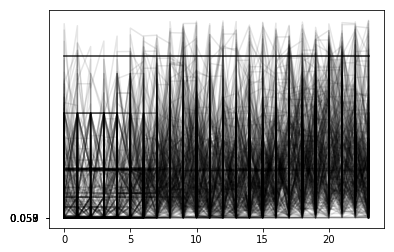

In [82]:
for day in workdays:
    #plt.subplot(131)
    mac = 'MAC000041' 
    hour_idx = df.loc[(df['day_time'].dt.year==day.year) & (df['day_time'].dt.month==day.month) & (df['day_time'].dt.day==day.day)].day_time.dt.hour.tolist()
    kwh = df.loc[(df['day_time'].dt.year==day.year) & (df['day_time'].dt.month==day.month) & (df['day_time'].dt.day==day.day), ['energy(kWh/hh)']]
    kwh=kwh['energy(kWh/hh)'].tolist()
    plt.yticks(np.arange(0, 2.0, 0.5))
    plt.plot(hour_idx, kwh, color=(0,0,0,0.1))

In [99]:
def plot_range(df, mac, output_folder, start_date, end_date): 
    workdays = pd.bdate_range(start_date, end_date)
    all_days = pd.date_range(start_date, end_date)
    weekends = all_days[np.logical_not(all_days.isin(workdays))]
    
    df = df.loc[df['LCLid'] == mac]
    for day in workdays:
        plt.subplot(131)
        hour_idx = df.loc[(df['day_time'].dt.year==day.year) & (df['day_time'].dt.month==day.month) & (df['day_time'].dt.day==day.day)].day_time.dt.hour
        kwh = df.loc[(df['day_time'].dt.year==day.year) & (df['day_time'].dt.month==day.month) & (df['day_time'].dt.day==day.day), ['energy(kWh/hh)']]
        kwh=kwh['energy(kWh/hh)']
        plt.yticks(np.arange(0, 2.0, 0.5))
        plt.plot(hour_idx, kwh, color=(0,0,0,0.1))
    
    for day in all_days:
        plt.subplot(132)
        hour_idx = df.loc[(df['day_time'].dt.year==day.year) & (df['day_time'].dt.month==day.month) & (df['day_time'].dt.day==day.day)].day_time.dt.hour
        kwh = df.loc[(df['day_time'].dt.year==day.year) & (df['day_time'].dt.month==day.month) & (df['day_time'].dt.day==day.day), ['energy(kWh/hh)']]
        kwh=kwh['energy(kWh/hh)']
        plt.yticks(np.arange(0, 2.0, 0.5))
        plt.plot(hour_idx, kwh, color=(0,0,0,0.1))
        
    plt.title(mac, fontsize = 20)
    for day in weekends:
        plt.subplot(133)
        hour_idx = df.loc[(df['day_time'].dt.year==day.year) & (df['day_time'].dt.month==day.month) & (df['day_time'].dt.day==day.day)].day_time.dt.hour
        kwh = df.loc[(df['day_time'].dt.year==day.year) & (df['day_time'].dt.month==day.month) & (df['day_time'].dt.day==day.day), ['energy(kWh/hh)']]
        kwh=kwh['energy(kWh/hh)']
        plt.yticks(np.arange(0, 2.0, 0.5))
        plt.plot(hour_idx, kwh, color=(0,0,0,0.1))

    plt.rcParams["figure.figsize"] = (20, 6)
    
    plt.savefig(output_folder + "/" + f"plot_df_{mac}_kwh.png")

    return plt.show()

/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


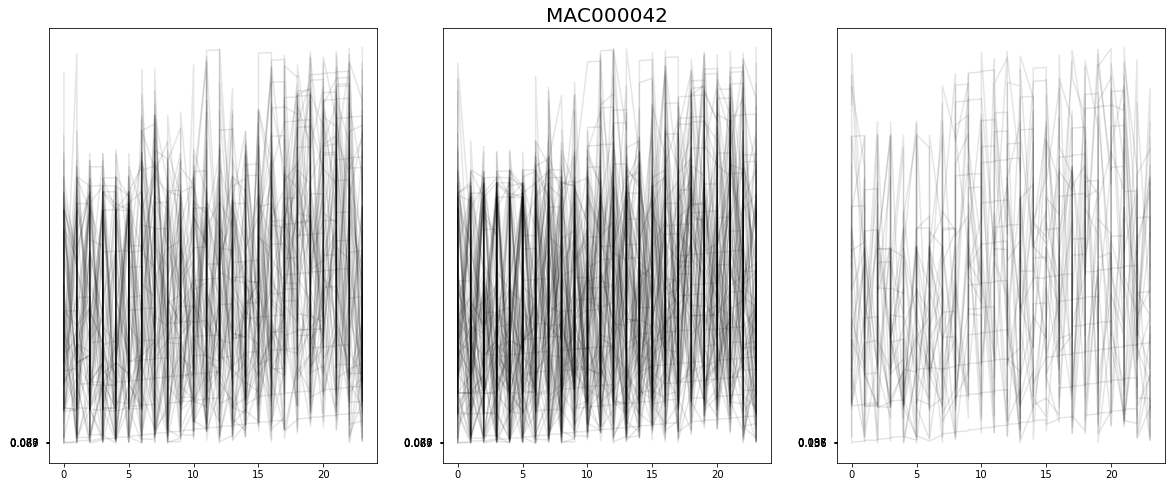

In [96]:
start_dt = "2012-10-12"
end_dt = "2012-12-31"    
plot_range(halfhourly_all, 'MAC000042', "plots", start_dt, end_dt)

In [75]:
def plot_day(df, days):
    for day in days:
        plt.plot(df[day].index.hour,
                         df[day]['energy(kWh/hh)'])
    plt.show()

/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


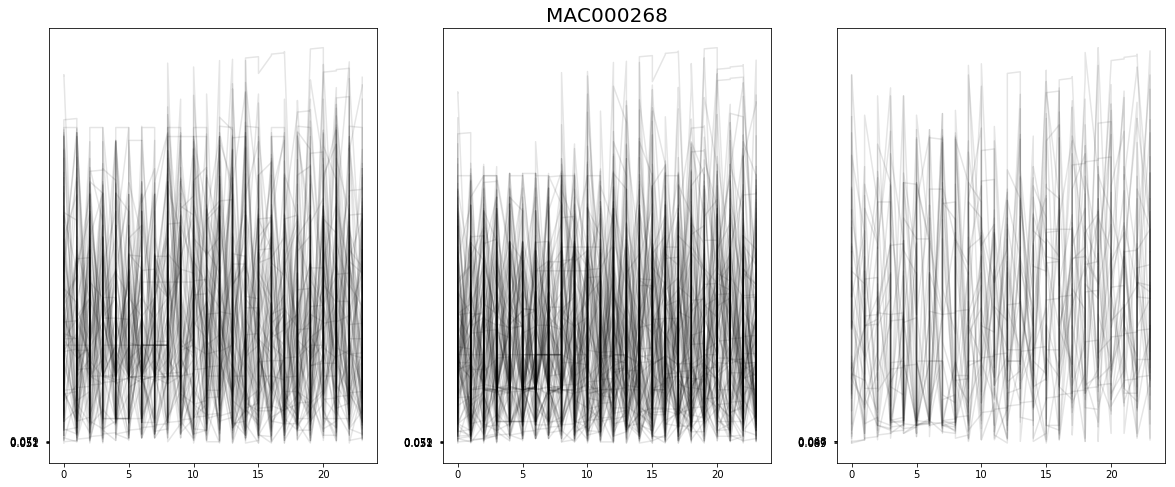

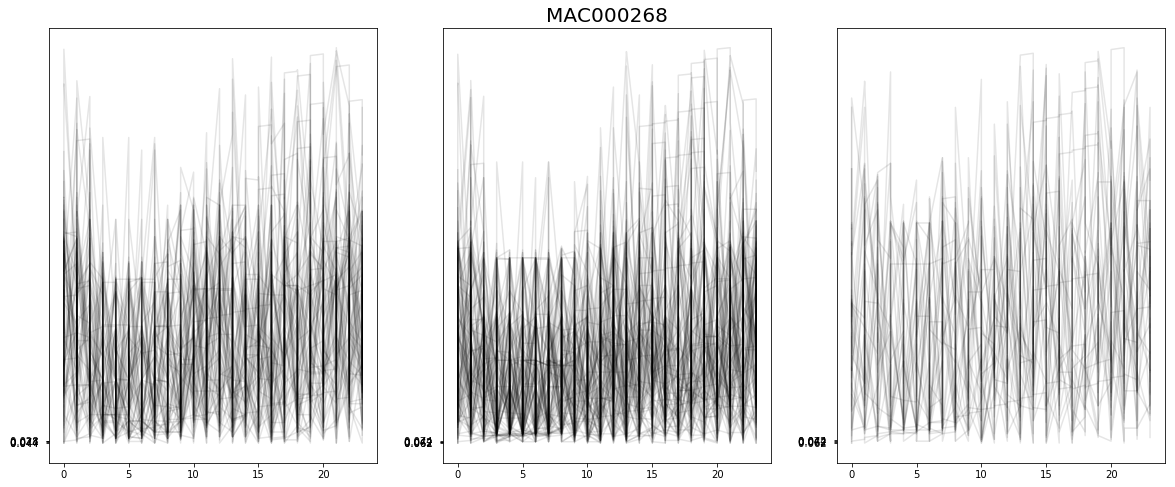

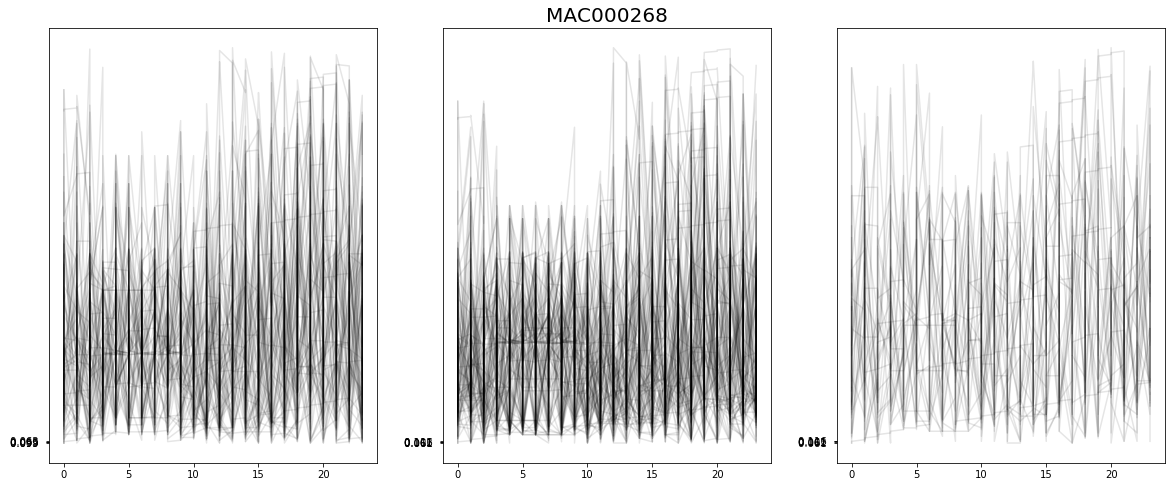

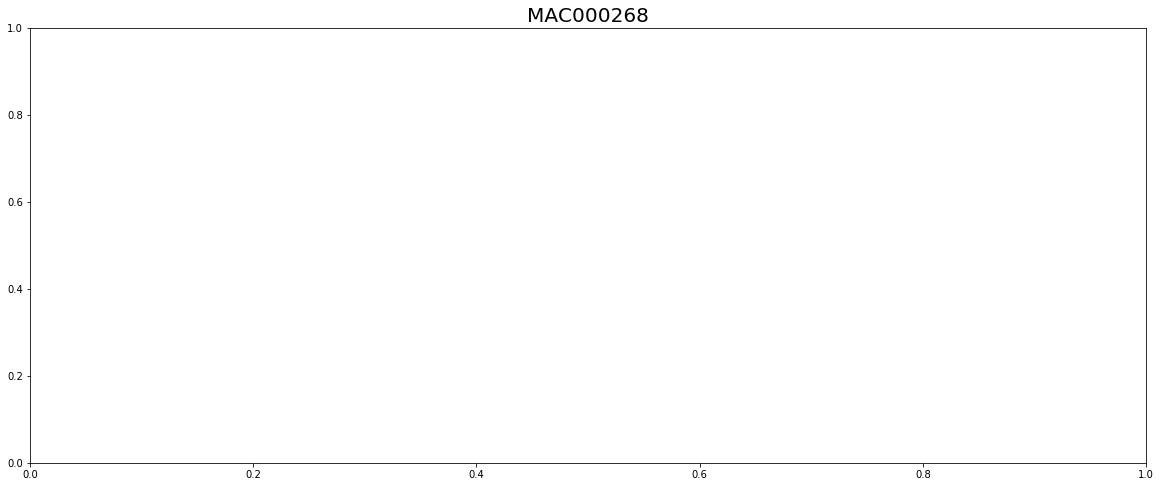

In [98]:
spring_start_2013 = "2013-"+ spring_start
spring_end_2013 = "2013-"+ spring_end
summer_start_2013 = "2013-"+ summer_start
summer_end_2013 = "2013-"+ summer_end
autumn_start_2013 = "2013-"+ autumn_start
autumn_end_2013 = "2013-"+ autumn_end
winter_start_2013 = "2013-"+ winter_start
winter_end_2013 = "2013-"+ winter_end
plot_range(halfhourly_all, 'MAC000268', "plots", spring_start_2013, spring_end_2013)
plot_range(halfhourly_all, 'MAC000268', "plots", summer_start_2013, summer_end_2013)
plot_range(halfhourly_all, 'MAC000268', "plots", autumn_start_2013, autumn_end_2013)
plot_range(halfhourly_all, 'MAC000268', "plots", winter_start_2013, winter_end_2013)

/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


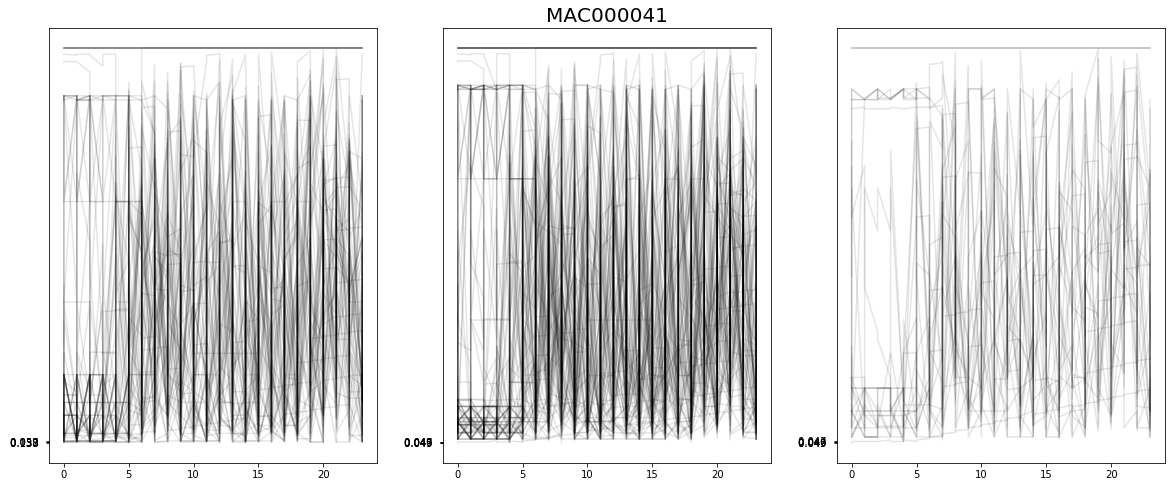

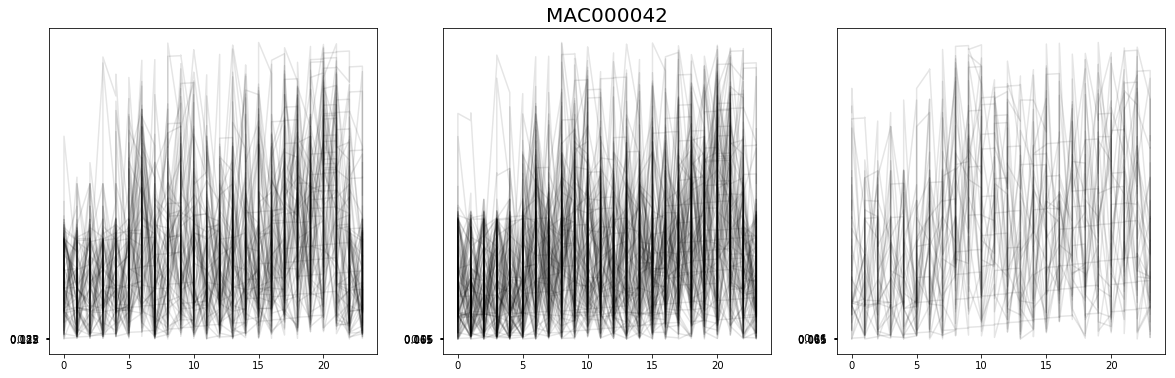

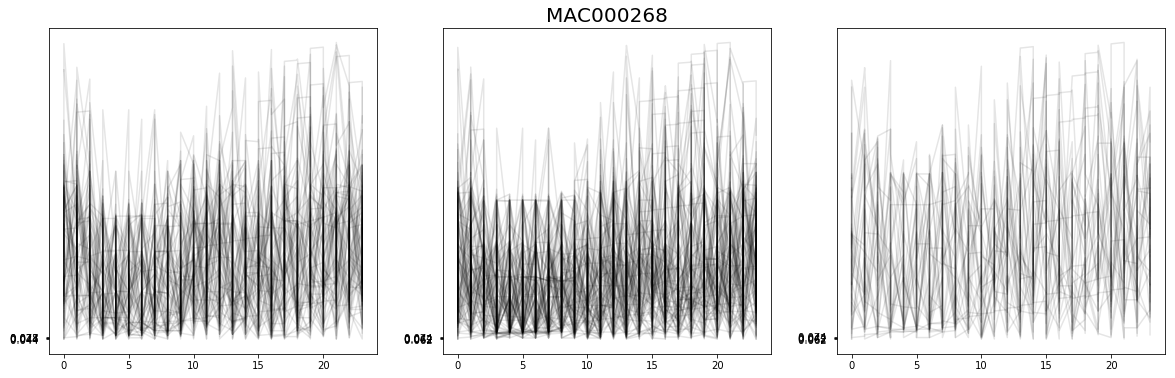

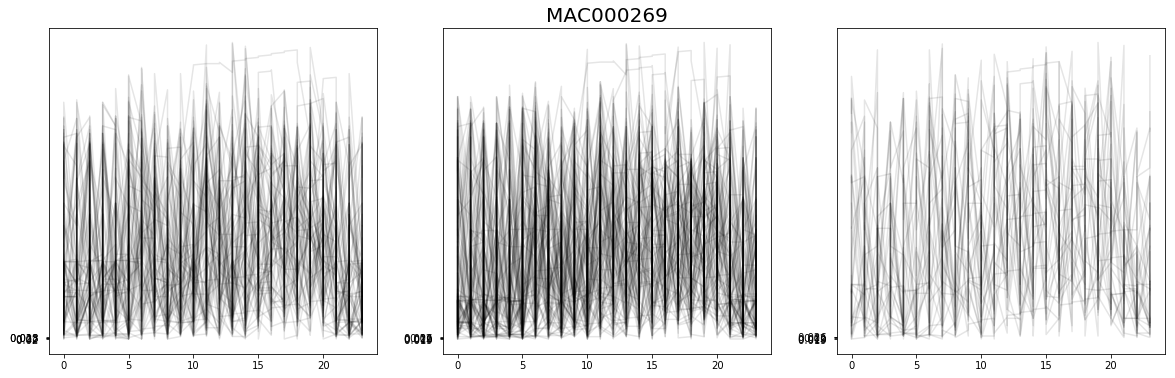

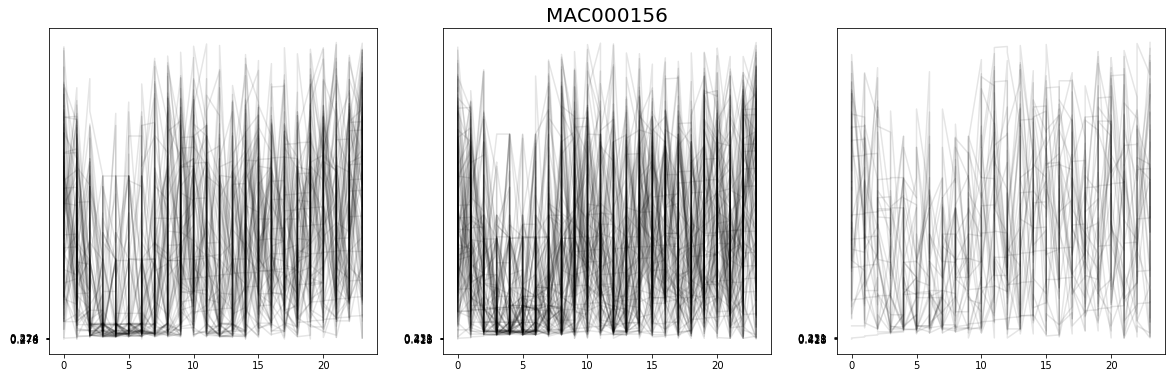

In [100]:
mac_list = ['MAC000041' , 'MAC000042' , 'MAC000268','MAC000269', 'MAC000156']
for mac in mac_list:
    plot_range(halfhourly_all, mac, "plots", summer_start_2013, summer_end_2013)